In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
feature = pd.read_csv('https://github.com/BolunDai0216/NYU21SummerSchoolML/raw/main/Day%205/fish_market_feature.csv')
label = pd.read_csv('https://github.com/BolunDai0216/NYU21SummerSchoolML/raw/main/Day%205/fish_market_label.csv')

In [3]:
from sklearn.model_selection import train_test_split
X = feature.values
y = label.values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.01, random_state=0)

X_test = pd.read_csv('https://github.com/BolunDai0216/NYU21SummerSchoolML/raw/main/Day%205/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://github.com/BolunDai0216/NYU21SummerSchoolML/raw/main/Day%205/fish_market_test_label.csv').values

In [4]:
def print_and_plot(y_pred, y):
    MAE = np.mean(np.abs(y_pred - y))
    MSE = np.mean((y_pred - y)**2)
    print ('The MSE is {:0.2f}'.format(MSE))
    print ('The MAE is {:0.2f}'.format(MAE))
    plt.figure(figsize=(8,6))
    plt.plot(y_pred, 'o', label='predicted')
    plt.plot(y, 'o', label='ground truth')
    plt.legend(loc='upper left')
    plt.grid()
    plt.ylabel('Weight')
    plt.xlabel('Index of Sample')
    plt.show()

## Ridge linear regression without feature engineering

The MSE is 6427.56
The MAE is 62.12


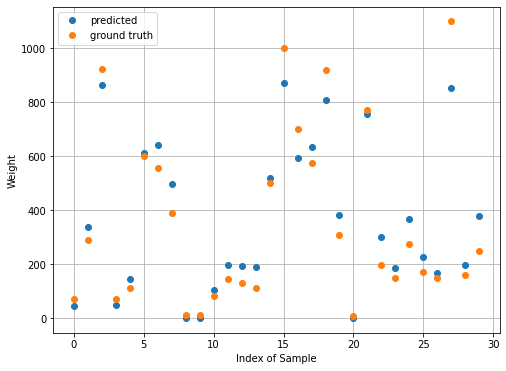

In [5]:
model = Ridge(alpha=10)
model.fit(X_train, y_train)

# If a prediction is negative, set it to zero
y_hat = np.maximum(model.predict(X_test), 0)
print_and_plot(y_hat, y_test)

## With polynomial feature transformation

The MSE is 3027.28
The MAE is 32.98


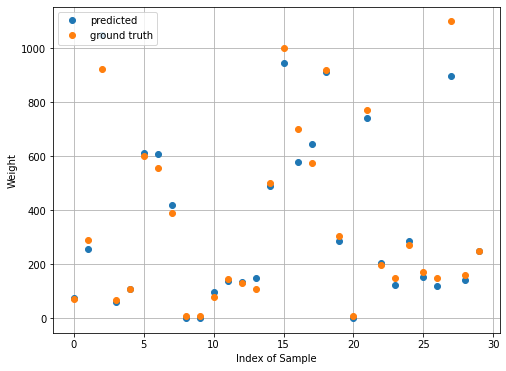

In [7]:
def design_matrix(x, M):
  phi = np.ones((x.shape[0],1))
  for i in range(1,M+1):
    phi = np.hstack((phi,x**i))
  return phi

M= 3

PhiX_train = design_matrix(X_train, M)
PhiX_test = design_matrix(X_test, M)

model = Ridge(1e2, fit_intercept=False)
model.fit(PhiX_train, y_train)
y_hat = model.predict(PhiX_test)
print_and_plot(y_hat, y_test)